# Configurações iniciais

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from linearmodels.panel import RandomEffects
import datetime

In [2]:
# Dando uma olhada na data de hoje
adate = datetime.date.today().strftime("%Y-%m-%d")

# Carregando os dados em formato .dta do Stata
data = pd.read_stata("replication data.dta")

# Dando uma olhada nos dados
data

,country,year,index25a,index5a,index75a,index10a,index125a,index15a,alternate,efw_index_1,...,y55,y56,y57,y58,y59,y60,y61,y62,y63,y64
0,Afghanistan,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,1961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,1962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,1963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,1964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,Zimbabwe,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.719465,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15886,Zimbabwe,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.480000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15887,Zimbabwe,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15888,Zimbabwe,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
# Colocando os dados em multi-index para painel
# Declarando o 'i' como índice do País e o 't' como índice do ano
data = data.set_index(['countrycode', 'year'], drop=False)

# Criando o log do PIB per capita para a análise
data['lngdp'] = np.log(data['gdppc'])

# Dando uma olhada nos dados
data

country    year  index25a  index5a  index75a   
countrycode year                                                       
Afghanistan 1960.0  Afghanistan  1960.0       NaN      NaN       NaN  \
            1961.0  Afghanistan  1961.0       NaN      NaN       NaN   
            1962.0  Afghanistan  1962.0       NaN      NaN       NaN   
            1963.0  Afghanistan  1963.0       NaN      NaN       NaN   
            1964.0  Afghanistan  1964.0       NaN      NaN       NaN   
...                         ...     ...       ...      ...       ...   
Zimbabwe    2019.0     Zimbabwe  2019.0       NaN      NaN       NaN   
            2020.0     Zimbabwe  2020.0       NaN      NaN       NaN   
            2021.0     Zimbabwe  2021.0       NaN      NaN       NaN   
            2022.0     Zimbabwe  2022.0       NaN      NaN       NaN   
            2023.0     Zimbabwe  2023.0       NaN      NaN       NaN   

                    index10a  index125a  index15a  alternate  efw_index_1   
countrycode year                                                            
Afghanistan 1960.0       NaN        NaN       NaN        NaN          NaN  \
            1961.0       NaN        NaN       NaN        NaN          NaN   
            1962.0       NaN        NaN       NaN        NaN          NaN   
            1963.0       NaN        NaN       NaN        NaN          NaN   
            1964.0       NaN        NaN       NaN        NaN          NaN   
...                      ...        ...       ...        ...          ...   
Zimbabwe    2019.0       NaN        NaN       NaN        NaN     4.719465   
            2020.0       NaN        NaN       NaN        NaN     4.480000   
            2021.0       NaN        NaN       NaN        NaN          NaN   
            2022.0       NaN        NaN       NaN        NaN          NaN   
            2023.0       NaN        NaN       NaN        NaN          NaN   

                    ...  y55  y56  y57  y58  y59  y60  y61  y62  y63  y64  
countrycode year    ...                                                    
Afghanistan 1960.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
            1961.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
            1962.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
            1963.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
            1964.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
Zimbabwe    2019.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
            2020.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
            2021.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
            2022.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
            2023.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  

[15890 rows x 93 columns]

In [4]:
# Criando a variavel de minimo de legor_uk por país (equivalente ao "1.legor_uk")
data['min_legor_uk'] = data.groupby('country')['legor_uk'].transform('min')

# Olhando se a variável foi criada corretamente
data['min_legor_uk']

countrycode  year  
Afghanistan  1960.0    0.0
             1961.0    0.0
             1962.0    0.0
             1963.0    0.0
             1964.0    0.0
                      ... 
Zimbabwe     2019.0    1.0
             2020.0    1.0
             2021.0    1.0
             2022.0    1.0
             2023.0    1.0
Name: min_legor_uk, Length: 15890, dtype: float64

In [5]:
# Criando lags de 1 e 5 anos das variáveis usadas nas regressões
lags = [1, 5]
variables = ['index25a', 'index5a', 'index75a', 'index10a', 'index125a', 'index15a', 'netoda_gdp_cons', 'resource_rent', 'index125a', 'gdpg', 'lngdp', 'alternate', 'christian_int', 'warDummy', 'legor_fr', 'coup', 'gini_disp', 'min_legor_uk']

for var in variables:
    for lag in lags:
        if lag == 1:
            data[f'l_{var}'] = data[var].shift(lag) 
        else:
            data[f'l{lag}_{var}'] = data[var].shift(lag)

In [6]:

# Criando um indicador de país com dados completos
data['sample_full'] = np.where((~data['l_gdpg'].isnull()) & 
                                (~data['l_lngdp'].isnull()) & 
                                (~data['l_netoda_gdp_cons'].isnull()) & 
                                (~data['efw_index_1_int'].isnull()) & 
                                (~data['warDummy'].isnull()) & 
                                (~data['l_alternate'].isnull()) & 
                                (~data['l_christian_int'].isnull()) & 
                                (~data['l_resource_rent'].isnull()) & 
                                (~data['min_legor_uk'].isnull()), 1, 0)


In [7]:
# Criando um dataframe apenas com os dados completos
df_filtered = data[data['sample_full'] == 1]

In [8]:
# Criando um indicador de país com dados completos para as variáveis especificadas
df_filtered['sample_full5'] = np.where((~df_filtered['l5_index25a'].isnull()) & 
                               (~df_filtered['l5_netoda_gdp_cons'].isnull()) & 
                               (~df_filtered['l5_resource_rent'].isnull()) & 
                               (~df_filtered['l5_lngdp'].isnull()) & 
                               (~df_filtered['l5_gdpg'].isnull()) & 
                               (~df_filtered['l5_warDummy'].isnull()) & 
                               (~df_filtered['l5_christian_int'].isnull()) & 
                               (~df_filtered['min_legor_uk'].isnull()) & 
                               (~df_filtered['l5_legor_fr'].isnull()) & 
                               (~df_filtered['l5_coup'].isnull()) & 
                               (~df_filtered['l5_gini_disp'].isnull()) & 
                               (~df_filtered['efw_index_1_int'].isnull()), 1, 0)

subset_5L = df_filtered[df_filtered['sample_full5'] == 1]

C:\Users\guian\AppData\Local\Temp\ipykernel_24428\597667771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sample_full5'] = np.where((~df_filtered['l5_index25a'].isnull()) &


# Tabela 2 - Sumário de estatísticas descritivas


In [9]:
# Criando as estatísticas descritivas para as variáveis efw_index_1_int e efw_index_1
# O efw_index_1_int é a variável de liberdade econômica interpolada para o ano t e o efw_index_1 é a variável de liberdade econômica para o ano t
efw_stats = df_filtered[['efw_index_1_int', 'efw_index_1']].describe()

# Criando as estatísticas descritivas para as variáveis index25a, index5a, index75a, index10a, index125a e index15a
# Essas variaveis são as taxas de desconto para memória do regime
multi_stats = df_filtered[['index25a', 'index5a', 'index75a', 'index10a', 
                          'index125a', 'index15a']].describe()  

# Criando as estatísticas descritivas para as variáveis de controle adicionais
other_stats = df_filtered[['netoda_gdp_cons', 'l_resource_rent', 'gdppc', 'gdpg', 
                          'warDummy', 'christian_int', 'legor_uk', 'legor_fr', 
                          'coup', 'gini_disp']].describe() 


In [10]:
# Dados transpostos
efw_stats = efw_stats.transpose()
efw_stats

,count,mean,std,min,25%,50%,75%,max
efw_index_1_int,4699.0,6.138698,1.297296,2.370152,5.176242,6.195428,7.179706,8.849427
efw_index_1,2534.0,6.528460,1.159425,2.370152,5.751824,6.651100,7.440007,8.849427


In [11]:
# Dados transpostos
multi_stats = multi_stats.transpose()
multi_stats

,count,mean,std,min,25%,50%,75%,max
index25a,4699.0,0.387388,6.053289,-10.0,-4.932185,-0.538582,6.000000,10.0
index5a,4699.0,1.010515,6.341417,-10.0,-4.842709,0.793132,7.000000,10.0
index75a,4699.0,1.435040,6.512435,-10.0,-4.716534,2.014048,7.897259,10.0
index10a,4699.0,1.735425,6.634987,-10.0,-4.645097,3.043038,8.034561,10.0
index125a,4699.0,1.950036,6.724942,-10.0,-4.588282,3.721570,8.612123,10.0
index15a,4699.0,2.105674,6.791350,-10.0,-4.631075,4.000000,8.887104,10.0


In [12]:
# Dados transpostos
other_stats = other_stats.transpose()
other_stats

,count,mean,std,min,25%,50%,75%,max
netoda_gdp_cons,4699.0,3.278842,5.594048,-0.404108,0.000000,0.690308,4.311052,81.430641
l_resource_rent,4699.0,7.130206,9.902853,0.000326,0.689513,3.068439,9.206702,79.740753
gdppc,4699.0,11220.826172,16500.599609,157.101151,1262.883728,3731.156006,14258.699707,114047.906250
gdpg,4699.0,3.668001,4.936245,-50.248066,1.550542,3.875825,6.071374,39.487095
warDummy,4699.0,0.085763,0.280043,0.000000,0.000000,0.000000,0.000000,1.000000
christian_int,4699.0,0.630347,0.480641,0.000000,0.000000,1.000000,1.000000,1.000000
legor_uk,4699.0,0.302405,0.459348,0.000000,0.000000,0.000000,1.000000,1.000000
legor_fr,4699.0,0.561396,0.496269,0.000000,0.000000,1.000000,1.000000,1.000000
coup,4479.0,0.043983,0.205080,0.000000,0.000000,0.000000,0.000000,1.000000
gini_disp,3530.0,39.069740,8.840777,20.299999,32.400002,39.599998,45.074997,65.400002


In [13]:
# Lista para concatenar os dados
concate = [efw_stats, multi_stats, other_stats]

# Concatenando os dados
tabela_completa = pd.concat(concate)

# Exibindo a tabela completa igual ao artigo
tabela_completa

,count,mean,std,min,25%,50%,75%,max
efw_index_1_int,4699.0,6.138698,1.297296,2.370152,5.176242,6.195428,7.179706,8.849427
efw_index_1,2534.0,6.528460,1.159425,2.370152,5.751824,6.651100,7.440007,8.849427
index25a,4699.0,0.387388,6.053289,-10.000000,-4.932185,-0.538582,6.000000,10.000000
index5a,4699.0,1.010515,6.341417,-10.000000,-4.842709,0.793132,7.000000,10.000000
index75a,4699.0,1.435040,6.512435,-10.000000,-4.716534,2.014048,7.897259,10.000000
index10a,4699.0,1.735425,6.634987,-10.000000,-4.645097,3.043038,8.034561,10.000000
index125a,4699.0,1.950036,6.724942,-10.000000,-4.588282,3.721570,8.612123,10.000000
index15a,4699.0,2.105674,6.791350,-10.000000,-4.631075,4.000000,8.887104,10.000000
netoda_gdp_cons,4699.0,3.278842,5.594048,-0.404108,0.000000,0.690308,4.311052,81.430641
l_resource_rent,4699.0,7.130206,9.902853,0.000326,0.689513,3.068439,9.206702,79.740753


# Figuras do Chile e da França

In [14]:
# Importando as bibliotecas necessárias para gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Criando um subset dos dados do Chile a partir de 1970 usando query para facilitar
data_chile = data.query("country == 'Chile' and year > 1969")

# Criando um subset dos dados da França a partir de 1970 usando query para facilitar
data_france = data.query("country == 'France' and year > 1969")

# Criando um subset dos dados do Brasil a partir de 1970 usando query para facilitar
data_brazil = data.query("country == 'Brazil' and year > 1969")



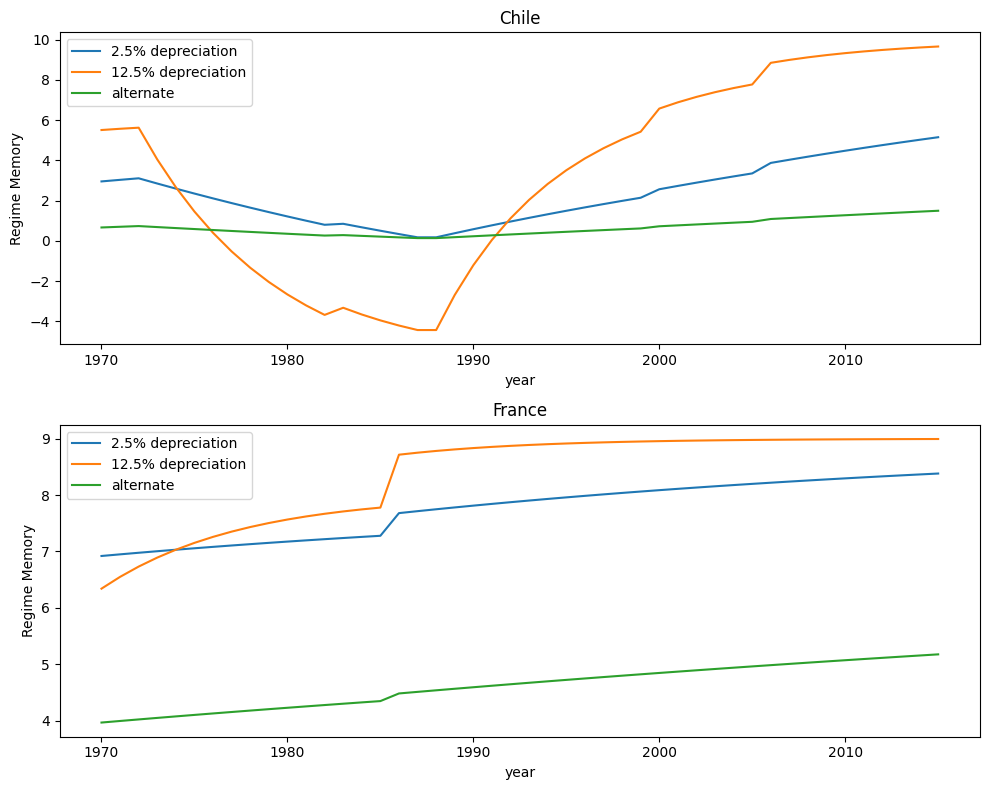

In [15]:
# Criando um gráfico com dois subplots para comparar os dados do Chile e da França
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plotando as linhas para o Chile e as respectivas legendas
sns.lineplot(data=data_chile, x='year', y='index25a', ax=axes[0], label='2.5% depreciation')
sns.lineplot(data=data_chile, x='year', y='index125a', ax=axes[0], label='12.5% depreciation')
sns.lineplot(data=data_chile, x='year', y='alternate', ax=axes[0], label='alternate')
axes[0].set_title('Chile')
axes[0].set_ylabel('Regime Memory')

# Plotando as linhas para a França e as respectivas legendas
sns.lineplot(data=data_france, x='year', y='index25a', ax=axes[1], label='2.5% depreciation')
sns.lineplot(data=data_france, x='year', y='index125a', ax=axes[1], label='12.5% depreciation')
sns.lineplot(data=data_france, x='year', y='alternate', ax=axes[1], label='alternate')
axes[1].set_title('France')
axes[1].set_ylabel('Regime Memory')

# Ajustando o layout
plt.tight_layout()

# Exbindo o gráfico final
plt.show()


## Brincando com o Brasil

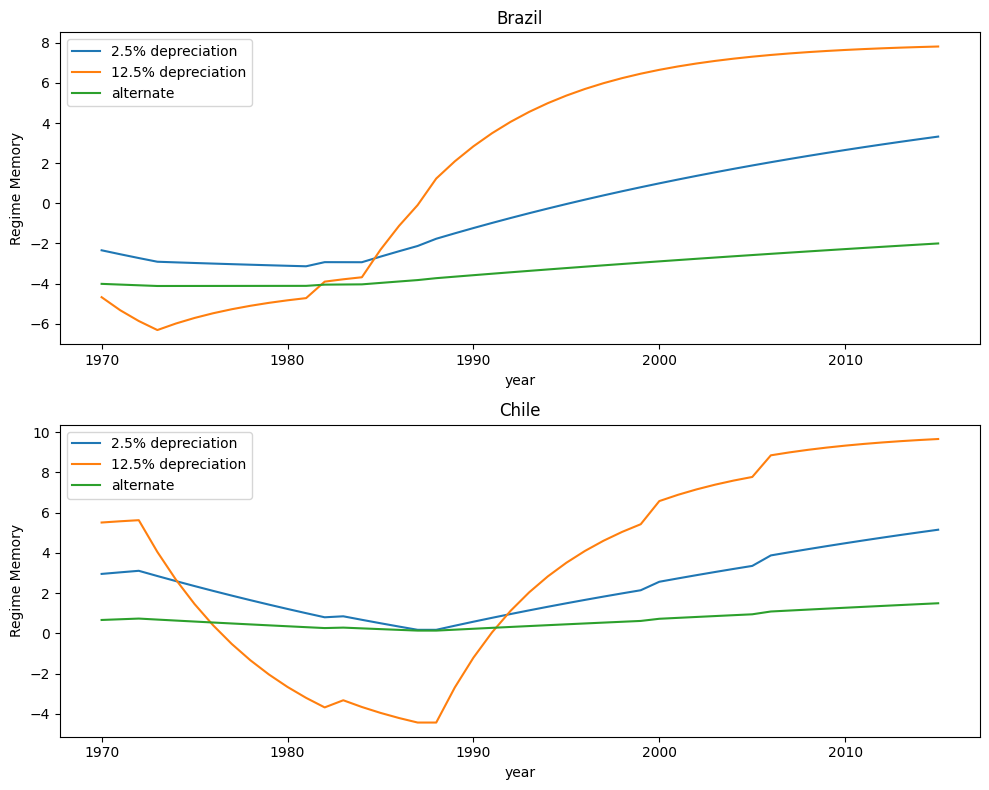

In [16]:
# Criando um gráfico com dois subplots para comparar os dados do Chile e da França
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plotando as linhas para o Chile e as respectivas legendas
sns.lineplot(data=data_brazil, x='year', y='index25a', ax=axes[0], label='2.5% depreciation')
sns.lineplot(data=data_brazil, x='year', y='index125a', ax=axes[0], label='12.5% depreciation')
sns.lineplot(data=data_brazil, x='year', y='alternate', ax=axes[0], label='alternate')
axes[0].set_title('Brazil')
axes[0].set_ylabel('Regime Memory')

# Plotando as linhas para o Chile e as respectivas legendas
sns.lineplot(data=data_chile, x='year', y='index25a', ax=axes[1], label='2.5% depreciation')
sns.lineplot(data=data_chile, x='year', y='index125a', ax=axes[1], label='12.5% depreciation')
sns.lineplot(data=data_chile, x='year', y='alternate', ax=axes[1], label='alternate')
axes[1].set_title('Chile')
axes[1].set_ylabel('Regime Memory')

# Ajustando o layout
plt.tight_layout()

# Exbindo o gráfico final
plt.show()

#### Outra visualização dos dados para o Chile e França
#### Tornando mais interativa a visualização dos dados

In [17]:
# Criando o gráfico para o Chile com o Plotly 
fig = px.line(data_chile, x='year', y=['index25a', 'index125a', 'alternate'], 
              facet_row='countrycode', facet_row_spacing=0.05,
              labels={'index25a': '2.5% depreciation', 'index125a': '12.5% depreciation', 'alternate': 'alternate'},
              title='Chile Regime Memory',
              width=1400, height=600)

# Dando um update no layout
fig.update_layout(yaxis=dict(title='Regime Memory'))

# Mostando o gráfico
fig.show()

In [18]:
# Criando o gráfico para a França com o Plotly
fig = px.line(data_france, x='year', y=['index25a', 'index125a', 'alternate'], 
              facet_row='countrycode', facet_row_spacing=0.05,
              labels={'index25a': '2.5% depreciation', 'index125a': '12.5% depreciation', 'alternate': 'alternate'},
              title='France Regime Memory',
              width=1400, height=600)

# Dando um update no layout
fig.update_layout(yaxis=dict(title='Regime Memory'))

# Mostando o gráfico
fig.show()


# Tabela 3 - Os resultados Principais

## Regressão 1

#### Robusto

In [19]:
formula1 = "efw_index_1_int ~ l_index25a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + C(year)"

# Exibe a nova fórmula
print(formula1)

model1 = PanelOLS.from_formula(formula=formula1, data=df_filtered, check_rank=False).fit(cov_type='robust')

model1.summary

efw_index_1_int ~ l_index25a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + C(year)


c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



Dep. Variable:,efw_index_1_int,R-squared:,0.7320
Estimator:,PanelOLS,R-squared (Between):,0.7658
No. Observations:,4697,R-squared (Within):,0.6113
Date:,"Sun, Jun 23 2024",R-squared (Overall):,0.7320
Time:,08:49:53,Log-likelihood,-4795.3
Cov. Estimator:,Robust,,
,,F-statistic:,239.26
Entities:,144,P-value,0.0000
Avg Obs:,32.618,Distribution:,"F(53,4643)"
Min Obs:,3.0000,,
Max Obs:,45.000,F-statistic (robust):,1.01e+04


#### Clusters

In [20]:
model1 = PanelOLS.from_formula(formula=formula1, data=df_filtered, check_rank=False).fit(cov_type='clustered', cluster_entity=True)

model1.summary

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



Dep. Variable:,efw_index_1_int,R-squared:,0.7320
Estimator:,PanelOLS,R-squared (Between):,0.7658
No. Observations:,4697,R-squared (Within):,0.6113
Date:,"Sun, Jun 23 2024",R-squared (Overall):,0.7320
Time:,08:49:53,Log-likelihood,-4795.3
Cov. Estimator:,Clustered,,
,,F-statistic:,239.26
Entities:,144,P-value,0.0000
Avg Obs:,32.618,Distribution:,"F(53,4643)"
Min Obs:,3.0000,,
Max Obs:,45.000,F-statistic (robust):,1402.1


## Regressão 2

#### Robusto


In [21]:
formula2 = "efw_index_1_int ~ l_index125a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + C(year)"

# Exibe a nova fórmula
print(formula2)

model2 = PanelOLS.from_formula(formula=formula2, data=df_filtered, check_rank=False).fit(cov_type='robust')

model2.summary

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



efw_index_1_int ~ l_index125a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + C(year)


Dep. Variable:,efw_index_1_int,R-squared:,0.7376
Estimator:,PanelOLS,R-squared (Between):,0.7687
No. Observations:,4697,R-squared (Within):,0.6302
Date:,"Sun, Jun 23 2024",R-squared (Overall):,0.7376
Time:,08:49:53,Log-likelihood,-4745.3
Cov. Estimator:,Robust,,
,,F-statistic:,246.28
Entities:,144,P-value,0.0000
Avg Obs:,32.618,Distribution:,"F(53,4643)"
Min Obs:,3.0000,,
Max Obs:,45.000,F-statistic (robust):,1.1e+04


#### Clusters

In [22]:
model2 = PanelOLS.from_formula(formula=formula2, data=df_filtered, check_rank=False).fit(cov_type='clustered', cluster_entity=True)

model2.summary

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



Dep. Variable:,efw_index_1_int,R-squared:,0.7376
Estimator:,PanelOLS,R-squared (Between):,0.7687
No. Observations:,4697,R-squared (Within):,0.6302
Date:,"Sun, Jun 23 2024",R-squared (Overall):,0.7376
Time:,08:49:54,Log-likelihood,-4745.3
Cov. Estimator:,Clustered,,
,,F-statistic:,246.28
Entities:,144,P-value,0.0000
Avg Obs:,32.618,Distribution:,"F(53,4643)"
Min Obs:,3.0000,,
Max Obs:,45.000,F-statistic (robust):,1409.8


## Regressão 3

#### Robusto

In [23]:
formula3 = "efw_index_1 ~ l_index25a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + C(year)"

# Exibe a nova fórmula
print(formula3)

df_filtered.dropna(subset=['efw_index_1'], inplace=True)

model3 = PanelOLS.from_formula(formula=formula3, data=df_filtered, check_rank=False).fit(cov_type='robust')

model3.summary

efw_index_1 ~ l_index25a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + C(year)


C:\Users\guian\AppData\Local\Temp\ipykernel_24428\955576998.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Dep. Variable:,efw_index_1,R-squared:,0.7298
Estimator:,PanelOLS,R-squared (Between):,0.7712
No. Observations:,2534,R-squared (Within):,0.5701
Date:,"Sun, Jun 23 2024",R-squared (Overall):,0.7298
Time:,08:49:54,Log-likelihood,-2312.1
Cov. Estimator:,Robust,,
,,F-statistic:,233.16
Entities:,144,P-value,0.0000
Avg Obs:,17.597,Distribution:,"F(29,2504)"
Min Obs:,3.0000,,
Max Obs:,21.000,F-statistic (robust):,1.397e+04


#### Clusters

In [24]:
df_filtered.dropna(subset=['efw_index_1'], inplace=True)

model3 = PanelOLS.from_formula(formula=formula3, data=df_filtered, check_rank=False).fit(cov_type='clustered', cluster_entity=True)

model3.summary

C:\Users\guian\AppData\Local\Temp\ipykernel_24428\563758147.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Dep. Variable:,efw_index_1,R-squared:,0.7298
Estimator:,PanelOLS,R-squared (Between):,0.7712
No. Observations:,2534,R-squared (Within):,0.5701
Date:,"Sun, Jun 23 2024",R-squared (Overall):,0.7298
Time:,08:49:54,Log-likelihood,-2312.1
Cov. Estimator:,Clustered,,
,,F-statistic:,233.16
Entities:,144,P-value,0.0000
Avg Obs:,17.597,Distribution:,"F(29,2504)"
Min Obs:,3.0000,,
Max Obs:,21.000,F-statistic (robust):,1610.7


# Regressão 4

#### Robusto

In [25]:
formula4 = "efw_index_1 ~ l_index125a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + C(year)"

# Exibe a nova fórmula
print(formula4)

model4 = PanelOLS.from_formula(formula=formula4, data=df_filtered, check_rank=False).fit(cov_type='robust')

model4.summary

efw_index_1 ~ l_index125a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + C(year)


Dep. Variable:,efw_index_1,R-squared:,0.7417
Estimator:,PanelOLS,R-squared (Between):,0.7760
No. Observations:,2534,R-squared (Within):,0.6031
Date:,"Sun, Jun 23 2024",R-squared (Overall):,0.7417
Time:,08:49:54,Log-likelihood,-2255.0
Cov. Estimator:,Robust,,
,,F-statistic:,247.91
Entities:,144,P-value,0.0000
Avg Obs:,17.597,Distribution:,"F(29,2504)"
Min Obs:,3.0000,,
Max Obs:,21.000,F-statistic (robust):,1.486e+04


#### Clusters

In [26]:
model4 = PanelOLS.from_formula(formula=formula4, data=df_filtered, check_rank=False).fit(cov_type='clustered', cluster_entity=True)

model4.summary

Dep. Variable:,efw_index_1,R-squared:,0.7417
Estimator:,PanelOLS,R-squared (Between):,0.7760
No. Observations:,2534,R-squared (Within):,0.6031
Date:,"Sun, Jun 23 2024",R-squared (Overall):,0.7417
Time:,08:49:54,Log-likelihood,-2255.0
Cov. Estimator:,Clustered,,
,,F-statistic:,247.91
Entities:,144,P-value,0.0000
Avg Obs:,17.597,Distribution:,"F(29,2504)"
Min Obs:,3.0000,,
Max Obs:,21.000,F-statistic (robust):,1663.9


In [27]:
# Extraindo os resultados apenas com os coeficientes
results = {
    'Dependent variable': [
        'Regime memory', 'Net ODA as % of GDP', 'Resource rent as % of GDP',
        'ln(GDP per capita)', 'GDP Growth', 'War Dummy', 'Christian Dummy',
        'British legal origin', 'French legal origin'
    ],
    'EFW index-interpolate (2.50%)': [
        f'{model1.params["l_index25a"]:.3f}',
        f'{model1.params["l_netoda_gdp_cons"]:.3f}',
        f'{model1.params["l_resource_rent"]:.3f}',
        f'{model1.params["l_lngdp"]:.3f}',
        f'{model1.params["l_gdpg"]:.3f}',
        f'{model1.params["l_warDummy"]:.3f}',
        f'{model1.params["l_christian_int"]:.3f}',
        f'{model1.params["min_legor_uk"]:.3f}',
        f'{model1.params["l_legor_fr"]:.3f}'
    ],
    'EFW index-interpolate (12.50%)': [
        f'{model2.params["l_index125a"]:.3f}',
        f'{model2.params["l_netoda_gdp_cons"]:.3f}',
        f'{model2.params["l_resource_rent"]:.3f}',
        f'{model2.params["l_lngdp"]:.3f}',
        f'{model2.params["l_gdpg"]:.3f}',
        f'{model2.params["l_warDummy"]:.3f}',
        f'{model2.params["l_christian_int"]:.3f}',
        f'{model2.params["min_legor_uk"]:.3f}',
        f'{model2.params["l_legor_fr"]:.3f}'
    ],
    'EFW index (2.50%)': [
        f'{model3.params["l_index25a"]:.3f}',
        f'{model3.params["l_netoda_gdp_cons"]:.3f}',
        f'{model3.params["l_resource_rent"]:.3f}',
        f'{model3.params["l_lngdp"]:.3f}',
        f'{model3.params["l_gdpg"]:.3f}',
        f'{model3.params["l_warDummy"]:.3f}',
        f'{model3.params["l_christian_int"]:.3f}',
        f'{model3.params["min_legor_uk"]:.3f}',
        f'{model3.params["l_legor_fr"]:.3f}'
    ],
    'EFW index (12.50%)': [
        f'{model4.params["l_index125a"]:.3f}',
        f'{model4.params["l_netoda_gdp_cons"]:.3f}',
        f'{model4.params["l_resource_rent"]:.3f}',
        f'{model4.params["l_lngdp"]:.3f}',
        f'{model4.params["l_gdpg"]:.3f}',
        f'{model4.params["l_warDummy"]:.3f}',
        f'{model4.params["l_christian_int"]:.3f}',
        f'{model4.params["min_legor_uk"]:.3f}',
        f'{model4.params["l_legor_fr"]:.3f}'
    ]
}

# Criando o DataFrame com os resultados
results_df = pd.DataFrame(results)

# Adicionando as linhas de estatísticas adicionais
additional_stats = {
    'Dependent variable': ['Number of observations', 'R2'],
    'EFW index-interpolate (2.50%)': [
        f'{model1.nobs}',
        f'{model1.rsquared:.3f}'
    ],
    'EFW index-interpolate (12.50%)': [
        f'{model2.nobs}',
        f'{model2.rsquared:.3f}'
    ],
    'EFW index (2.50%)': [
        f'{model3.nobs}',
        f'{model3.rsquared:.3f}'
    ],
    'EFW index (12.50%)': [
        f'{model4.nobs}',
        f'{model4.rsquared:.3f}'
    ]
}

additional_stats_df = pd.DataFrame(additional_stats)
final_df = pd.concat([results_df, additional_stats_df], ignore_index=True)

final_df

,Dependent variable,EFW index-interpolate (2.50%),EFW index-interpolate (12.50%),EFW index (2.50%),EFW index (12.50%)
0,Regime memory,0.043,0.045,0.024,0.037
1,Net ODA as % of GDP,0.020,0.020,0.021,0.021
2,Resource rent as % of GDP,-0.023,-0.021,-0.028,-0.024
3,ln(GDP per capita),0.492,0.499,0.476,0.468
4,GDP Growth,0.019,0.019,0.021,0.020
5,War Dummy,-0.234,-0.209,-0.195,-0.200
6,Christian Dummy,-0.143,-0.185,0.029,-0.051
7,British legal origin,0.089,0.162,0.125,0.177
8,French legal origin,-0.065,-0.047,-0.040,-0.019
9,Number of observations,4697,4697,2534,2534


In [28]:
# Convertendo o DataFrame para LaTeX
latex_table = final_df.to_latex(index=False, column_format='lcccc', caption='Main results.', label='tab:main_results', escape=False)

# Ajustando a largura da tabela com resizebox
latex_table = latex_table.replace('\\begin{tabular}', '\\resizebox{\\textwidth}{!}{\\begin{tabular}')
latex_table = latex_table.replace('\\end{tabular}', '\\end{tabular}}')

print(latex_table)

\begin{table}
\caption{Main results.}
\label{tab:main_results}
\resizebox{\textwidth}{!}{\begin{tabular}{lcccc}
\toprule
Dependent variable & EFW index-interpolate (2.50%) & EFW index-interpolate (12.50%) & EFW index (2.50%) & EFW index (12.50%) \\
\midrule
Regime memory & 0.043 & 0.045 & 0.024 & 0.037 \\
Net ODA as % of GDP & 0.020 & 0.020 & 0.021 & 0.021 \\
Resource rent as % of GDP & -0.023 & -0.021 & -0.028 & -0.024 \\
ln(GDP per capita) & 0.492 & 0.499 & 0.476 & 0.468 \\
GDP Growth & 0.019 & 0.019 & 0.021 & 0.020 \\
War Dummy & -0.234 & -0.209 & -0.195 & -0.200 \\
Christian Dummy & -0.143 & -0.185 & 0.029 & -0.051 \\
British legal origin & 0.089 & 0.162 & 0.125 & 0.177 \\
French legal origin & -0.065 & -0.047 & -0.040 & -0.019 \\
Number of observations & 4697 & 4697 & 2534 & 2534 \\
R2 & 0.732 & 0.738 & 0.730 & 0.742 \\
\bottomrule
\end{tabular}}
\end{table}



# Tabela 4 - Controles adicionais - Coup e Gini

## EFW index interpolate

#### Robusto

In [29]:
# Definindo a fórmula do modelo usando control2
formula5 = "efw_index_1_int ~ l_index25a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + l_coup + C(year)"

df_filtered1 = data[data['sample_full'] == 1]

# Exibindo a fórmula
print(formula5)

model5 = PanelOLS.from_formula(formula=formula5, data=df_filtered1, check_rank=False).fit(cov_type='robust')

# Exibindo o resumo do modelo
print(model5.summary)


efw_index_1_int ~ l_index25a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + l_coup + C(year)


c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



                          PanelOLS Estimation Summary                           
Dep. Variable:        efw_index_1_int   R-squared:                        0.7267
Estimator:                   PanelOLS   R-squared (Between):              0.7603
No. Observations:                4477   R-squared (Within):               0.6037
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.7267
Time:                        08:49:54   Log-likelihood                   -4631.9
Cov. Estimator:                Robust                                           
                                        F-statistic:                      217.72
Entities:                         136   P-value                           0.0000
Avg Obs:                       32.919   Distribution:                 F(54,4422)
Min Obs:                       3.0000                                           
Max Obs:                       45.000   F-statistic (robust):             9233.0
                            

#### Clusters

In [30]:
model5 = PanelOLS.from_formula(formula=formula5, data=df_filtered1, check_rank=False).fit(cov_type='clustered', cluster_entity=True)

# Exibindo o resumo do modelo
print(model5.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:        efw_index_1_int   R-squared:                        0.7267
Estimator:                   PanelOLS   R-squared (Between):              0.7603
No. Observations:                4477   R-squared (Within):               0.6037
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.7267
Time:                        08:49:55   Log-likelihood                   -4631.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      217.72
Entities:                         136   P-value                           0.0000
Avg Obs:                       32.919   Distribution:                 F(54,4422)
Min Obs:                       3.0000                                           
Max Obs:                       45.000   F-statistic (robust):             1335.7
                            

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



In [31]:
reg5 = model5

df_filtered['res5'] = model5.resids

C:\Users\guian\AppData\Local\Temp\ipykernel_24428\639811588.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Robusto

In [32]:
# Definindo a fórmula do modelo usando control3
formula6 = "efw_index_1_int ~ l_index25a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + l_coup + l_gini_disp + C(year)"

# Exibindo a fórmula
print(formula6)

model6 = PanelOLS.from_formula(formula=formula6, data=df_filtered1, check_rank=False).fit(cov_type='robust')

# Exibindo o resumo do modelo
print(model6.summary)

efw_index_1_int ~ l_index25a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + l_coup + l_gini_disp + C(year)
                          PanelOLS Estimation Summary                           
Dep. Variable:        efw_index_1_int   R-squared:                        0.7141
Estimator:                   PanelOLS   R-squared (Between):              0.7340
No. Observations:                3462   R-squared (Within):               0.6232
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.7141
Time:                        08:49:55   Log-likelihood                   -3426.2
Cov. Estimator:                Robust                                           
                                        F-statistic:                      154.68
Entities:                         134   P-value                           0.0000
Avg Obs:                       25.836   Distribution:                 F(55,3406)
Min Obs:    

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



#### Clusters

In [33]:
model6 = PanelOLS.from_formula(formula=formula6, data=df_filtered1, check_rank=False).fit(cov_type='clustered', cluster_entity=True)

# Exibindo o resumo do modelo
print(model6.summary)

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



                          PanelOLS Estimation Summary                           
Dep. Variable:        efw_index_1_int   R-squared:                        0.7141
Estimator:                   PanelOLS   R-squared (Between):              0.7340
No. Observations:                3462   R-squared (Within):               0.6232
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.7141
Time:                        08:49:55   Log-likelihood                   -3426.2
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      154.68
Entities:                         134   P-value                           0.0000
Avg Obs:                       25.836   Distribution:                 F(55,3406)
Min Obs:                       1.0000                                           
Max Obs:                       45.000   F-statistic (robust):             1082.9
                            

#### Robusto

In [34]:
# Definindo a fórmula do modelo usando control2
formula7 = "efw_index_1_int ~ l_index125a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + l_coup + C(year)"

# Exibindo a fórmula
print(formula7)

model7 = PanelOLS.from_formula(formula=formula7, data=df_filtered1, check_rank=False).fit(cov_type='robust')

# Exibindo o resumo do modelo
print(model7.summary)

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



efw_index_1_int ~ l_index125a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + l_coup + C(year)
                          PanelOLS Estimation Summary                           
Dep. Variable:        efw_index_1_int   R-squared:                        0.7328
Estimator:                   PanelOLS   R-squared (Between):              0.7623
No. Observations:                4477   R-squared (Within):               0.6235
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.7328
Time:                        08:49:55   Log-likelihood                   -4581.6
Cov. Estimator:                Robust                                           
                                        F-statistic:                      224.53
Entities:                         136   P-value                           0.0000
Avg Obs:                       32.919   Distribution:                 F(54,4422)
Min Obs:                 

#### Clusters

In [35]:
model7 = PanelOLS.from_formula(formula=formula7, data=df_filtered1, check_rank=False).fit(cov_type='clustered', cluster_entity=True)

# Exibindo o resumo do modelo
print(model7.summary)

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



                          PanelOLS Estimation Summary                           
Dep. Variable:        efw_index_1_int   R-squared:                        0.7328
Estimator:                   PanelOLS   R-squared (Between):              0.7623
No. Observations:                4477   R-squared (Within):               0.6235
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.7328
Time:                        08:49:55   Log-likelihood                   -4581.6
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      224.53
Entities:                         136   P-value                           0.0000
Avg Obs:                       32.919   Distribution:                 F(54,4422)
Min Obs:                       3.0000                                           
Max Obs:                       45.000   F-statistic (robust):             1324.2
                            

#### Robusto

In [36]:
# Definindo a fórmula do modelo usando control3
formula8 = "efw_index_1_int ~ l_index125a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + l_coup + l_gini_disp + C(year)"

# Exibindo a fórmula
print(formula8)

model8 = PanelOLS.from_formula(formula=formula8, data=df_filtered1, check_rank=False).fit(cov_type='robust')

# Exibindo o resumo do modelo
print(model8.summary)

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



efw_index_1_int ~ l_index125a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + l_coup + l_gini_disp + C(year)
                          PanelOLS Estimation Summary                           
Dep. Variable:        efw_index_1_int   R-squared:                        0.7242
Estimator:                   PanelOLS   R-squared (Between):              0.7413
No. Observations:                3462   R-squared (Within):               0.6493
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.7242
Time:                        08:49:55   Log-likelihood                   -3363.7
Cov. Estimator:                Robust                                           
                                        F-statistic:                      162.64
Entities:                         134   P-value                           0.0000
Avg Obs:                       25.836   Distribution:                 F(55,3406)
Min Obs:   

#### Clusters

In [37]:
model8 = PanelOLS.from_formula(formula=formula8, data=df_filtered1, check_rank=False).fit(cov_type='clustered', cluster_entity=True)

# Exibindo o resumo do modelo
print(model8.summary)

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



                          PanelOLS Estimation Summary                           
Dep. Variable:        efw_index_1_int   R-squared:                        0.7242
Estimator:                   PanelOLS   R-squared (Between):              0.7413
No. Observations:                3462   R-squared (Within):               0.6493
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.7242
Time:                        08:49:56   Log-likelihood                   -3363.7
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      162.64
Entities:                         134   P-value                           0.0000
Avg Obs:                       25.836   Distribution:                 F(55,3406)
Min Obs:                       1.0000                                           
Max Obs:                       45.000   F-statistic (robust):             1125.1
                            

In [38]:
# Extraindo os resultados apenas com os coeficientes
results = {
    'Dependent variable': [
        'Regime memory', 'Net ODA as % of GDP', 'Resource rent as % of GDP',
        'ln(GDP per capita)', 'GDP Growth', 'War Dummy', 'Christian Dummy',
        'British legal origin', 'French legal origin', 'Coup Dummy', 'Gini Disposable'
    ],
    'EFW index-interpolate (2.50%)': [
        f'{model5.params["l_index25a"]:.3f}',
        f'{model5.params["l_netoda_gdp_cons"]:.3f}',
        f'{model5.params["l_resource_rent"]:.3f}',
        f'{model5.params["l_lngdp"]:.3f}',
        f'{model5.params["l_gdpg"]:.3f}',
        f'{model5.params["l_warDummy"]:.3f}',
        f'{model5.params["l_christian_int"]:.3f}',
        f'{model5.params["min_legor_uk"]:.3f}',
        f'{model5.params["l_legor_fr"]:.3f}',
        f'{model5.params["l_coup"]:.3f}',
        'NA'
    ],
    'EFW index-interpolate (12.50%)': [
        f'{model7.params["l_index125a"]:.3f}',
        f'{model7.params["l_netoda_gdp_cons"]:.3f}',
        f'{model7.params["l_resource_rent"]:.3f}',
        f'{model7.params["l_lngdp"]:.3f}',
        f'{model7.params["l_gdpg"]:.3f}',
        f'{model7.params["l_warDummy"]:.3f}',
        f'{model7.params["l_christian_int"]:.3f}',
        f'{model7.params["min_legor_uk"]:.3f}',
        f'{model7.params["l_legor_fr"]:.3f}',
        f'{model7.params["l_coup"]:.3f}',
        'NA'
    ],
    'EFW index (2.50%)': [
        f'{model6.params["l_index25a"]:.3f}',
        f'{model6.params["l_netoda_gdp_cons"]:.3f}',
        f'{model6.params["l_resource_rent"]:.3f}',
        f'{model6.params["l_lngdp"]:.3f}',
        f'{model6.params["l_gdpg"]:.3f}',
        f'{model6.params["l_warDummy"]:.3f}',
        f'{model6.params["l_christian_int"]:.3f}',
        f'{model6.params["min_legor_uk"]:.3f}',
        f'{model6.params["l_legor_fr"]:.3f}',
        f'{model6.params["l_coup"]:.3f}',
        f'{model6.params["l_gini_disp"]:.3f}'
    ],
    'EFW index (12.50%)': [
        f'{model8.params["l_index125a"]:.3f}',
        f'{model8.params["l_netoda_gdp_cons"]:.3f}',
        f'{model8.params["l_resource_rent"]:.3f}',
        f'{model8.params["l_lngdp"]:.3f}',
        f'{model8.params["l_gdpg"]:.3f}',
        f'{model8.params["l_warDummy"]:.3f}',
        f'{model8.params["l_christian_int"]:.3f}',
        f'{model8.params["min_legor_uk"]:.3f}',
        f'{model8.params["l_legor_fr"]:.3f}',
        f'{model8.params["l_coup"]:.3f}',
        f'{model8.params["l_gini_disp"]:.3f}'
    ]
}

# Criando o DataFrame com os resultados
results_df = pd.DataFrame(results)

# Adicionando as linhas de estatísticas adicionais
additional_stats = {
    'Dependent variable': ['Number of observations', 'R2'],
    'EFW index-interpolate (2.50%)': [
        f'{model5.nobs}',
        f'{model5.rsquared:.3f}'
    ],
    'EFW index-interpolate (12.50%)': [
        f'{model7.nobs}',
        f'{model7.rsquared:.3f}'
    ],
    'EFW index (2.50%)': [
        f'{model6.nobs}',
        f'{model6.rsquared:.3f}'
    ],
    'EFW index (12.50%)': [
        f'{model8.nobs}',
        f'{model8.rsquared:.3f}'
    ]
}

additional_stats_df = pd.DataFrame(additional_stats)
final_df = pd.concat([results_df, additional_stats_df], ignore_index=True)

# Convertendo o DataFrame para LaTeX
latex_table = final_df.to_latex(index=False, column_format='lcccc', caption='Main results.', label='tab:main_results', escape=False)

# Ajustando a largura da tabela com resizebox
latex_table = latex_table.replace('\\begin{tabular}', '\\resizebox{\\textwidth}{!}{\\begin{tabular}')
latex_table = latex_table.replace('\\end{tabular}', '\\end{tabular}}')

print(latex_table)

\begin{table}
\caption{Main results.}
\label{tab:main_results}
\resizebox{\textwidth}{!}{\begin{tabular}{lcccc}
\toprule
Dependent variable & EFW index-interpolate (2.50%) & EFW index-interpolate (12.50%) & EFW index (2.50%) & EFW index (12.50%) \\
\midrule
Regime memory & 0.045 & 0.046 & 0.045 & 0.050 \\
Net ODA as % of GDP & 0.021 & 0.021 & 0.021 & 0.022 \\
Resource rent as % of GDP & -0.023 & -0.021 & -0.026 & -0.023 \\
ln(GDP per capita) & 0.485 & 0.493 & 0.464 & 0.481 \\
GDP Growth & 0.020 & 0.019 & 0.032 & 0.032 \\
War Dummy & -0.244 & -0.222 & -0.193 & -0.167 \\
Christian Dummy & -0.132 & -0.178 & -0.049 & -0.113 \\
British legal origin & 0.077 & 0.156 & 0.061 & 0.148 \\
French legal origin & -0.072 & -0.050 & -0.143 & -0.120 \\
Coup Dummy & -0.039 & -0.021 & -0.131 & -0.102 \\
Gini Disposable & NA & NA & 0.002 & 0.004 \\
Number of observations & 4477 & 4477 & 3462 & 3462 \\
R2 & 0.727 & 0.733 & 0.714 & 0.724 \\
\bottomrule
\end{tabular}}
\end{table}



# Tabela 5 - OLS agrupado - Atraso de 5 períodos - colunas 1 e 2

#### Robusto

In [39]:
# Definindo a fórmula do modelo usando control5
formula9 = "efw_index_1_int ~ l5_index25a + l5_netoda_gdp_cons + l5_resource_rent + l5_lngdp + l5_gdpg + l5_warDummy + l5_christian_int + min_legor_uk + l5_legor_fr + l5_coup + l5_gini_disp + C(year)"

# Exibindo a fórmula
print(formula9)

model9 = PanelOLS.from_formula(formula=formula9, data=subset_5L, check_rank=False).fit(cov_type='robust')

# Exibindo o resumo do modelo
print(model9.summary)

efw_index_1_int ~ l5_index25a + l5_netoda_gdp_cons + l5_resource_rent + l5_lngdp + l5_gdpg + l5_warDummy + l5_christian_int + min_legor_uk + l5_legor_fr + l5_coup + l5_gini_disp + C(year)
                          PanelOLS Estimation Summary                           
Dep. Variable:        efw_index_1_int   R-squared:                        0.6889
Estimator:                   PanelOLS   R-squared (Between):              0.7230
No. Observations:                3097   R-squared (Within):               0.5612
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.6889
Time:                        08:49:56   Log-likelihood                   -3110.1
Cov. Estimator:                Robust                                           
                                        F-statistic:                      132.24
Entities:                         134   P-value                           0.0000
Avg Obs:                       23.112   Distribution:                 F(51,3045)
Mi

#### Clusters

In [40]:
model9 = PanelOLS.from_formula(formula=formula9, data=subset_5L, check_rank=False).fit(cov_type='clustered', cluster_entity=True)

# Exibindo o resumo do modelo
print(model9.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:        efw_index_1_int   R-squared:                        0.6889
Estimator:                   PanelOLS   R-squared (Between):              0.7230
No. Observations:                3097   R-squared (Within):               0.5612
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.6889
Time:                        08:49:56   Log-likelihood                   -3110.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      132.24
Entities:                         134   P-value                           0.0000
Avg Obs:                       23.112   Distribution:                 F(51,3045)
Min Obs:                       1.0000                                           
Max Obs:                       41.000   F-statistic (robust):             1289.4
                            

#### Robusto

In [41]:
# Definindo a fórmula do modelo usando control5
formula10 = "efw_index_1_int ~ l5_index125a + l5_netoda_gdp_cons + l5_resource_rent + l5_lngdp + l5_gdpg + l5_warDummy + l5_christian_int + min_legor_uk + l5_legor_fr + l5_coup + l5_gini_disp + C(year)"

# Exibindo a fórmula
print(formula10)

model10 = PanelOLS.from_formula(formula=formula10, data=subset_5L, check_rank=False).fit(cov_type='robust')

# Exibindo o resumo do modelo
print(model10.summary)

efw_index_1_int ~ l5_index125a + l5_netoda_gdp_cons + l5_resource_rent + l5_lngdp + l5_gdpg + l5_warDummy + l5_christian_int + min_legor_uk + l5_legor_fr + l5_coup + l5_gini_disp + C(year)
                          PanelOLS Estimation Summary                           
Dep. Variable:        efw_index_1_int   R-squared:                        0.7027
Estimator:                   PanelOLS   R-squared (Between):              0.7303
No. Observations:                3097   R-squared (Within):               0.6022
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.7027
Time:                        08:49:56   Log-likelihood                   -3039.8
Cov. Estimator:                Robust                                           
                                        F-statistic:                      141.15
Entities:                         134   P-value                           0.0000
Avg Obs:                       23.112   Distribution:                 F(51,3045)
M

#### Clusters

In [42]:
model10 = PanelOLS.from_formula(formula=formula10, data=subset_5L, check_rank=False).fit(cov_type='clustered', cluster_entity=True)

# Exibindo o resumo do modelo
print(model10.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:        efw_index_1_int   R-squared:                        0.7027
Estimator:                   PanelOLS   R-squared (Between):              0.7303
No. Observations:                3097   R-squared (Within):               0.6022
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.7027
Time:                        08:49:56   Log-likelihood                   -3039.8
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      141.15
Entities:                         134   P-value                           0.0000
Avg Obs:                       23.112   Distribution:                 F(51,3045)
Min Obs:                       1.0000                                           
Max Obs:                       41.000   F-statistic (robust):             1288.8
                            

# Períodos de 5 anos - colunas 3 e 4 na tabela 5

In [43]:
# Criar uma nova coluna 'five' com valor inicial de 0
df_filtered['five'] = 0

# Substituir os valores da coluna 'five' de acordo com as condições do do-file
df_filtered.loc[df_filtered['year'] == 1965, 'five'] = 1
df_filtered.loc[(df_filtered['efw_index_1'].notnull()) & (df_filtered['year'] < 2001), 'five'] = 1
df_filtered.loc[df_filtered['year'] == 2005, 'five'] = 1
df_filtered.loc[df_filtered['year'] == 2010, 'five'] = 1
df_filtered.loc[df_filtered['year'] == 2015, 'five'] = 1

C:\Users\guian\AppData\Local\Temp\ipykernel_24428\2097788657.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
#df_filtered = data[data['sample_full'] == 1]
df_filtered_five = df_filtered[df_filtered['five'] == 1]

#### Robusto

In [45]:
# Definindo a fórmula do modelo usando control3
formula11 = "efw_index_1_int ~ l_index25a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + l_coup + l_gini_disp + C(year)"

# Exibindo a fórmula
print(formula11)

model11 = PanelOLS.from_formula(formula=formula11, data=df_filtered_five, check_rank=False).fit(cov_type='robust')

# Exibindo o resumo do modelo
print(model11.summary)

efw_index_1_int ~ l_index25a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + l_coup + l_gini_disp + C(year)
                          PanelOLS Estimation Summary                           
Dep. Variable:        efw_index_1_int   R-squared:                        0.7143
Estimator:                   PanelOLS   R-squared (Between):              0.7193
No. Observations:                 727   R-squared (Within):               0.6340
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.7143
Time:                        08:49:56   Log-likelihood                   -722.09
Cov. Estimator:                Robust                                           
                                        F-statistic:                      93.016
Entities:                         133   P-value                           0.0000
Avg Obs:                       5.4662   Distribution:                  F(19,707)
Min Obs:    

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



#### Clusters

In [46]:
model11 = PanelOLS.from_formula(formula=formula11, data=df_filtered_five, check_rank=False).fit(cov_type='clustered', cluster_entity=True)

# Exibindo o resumo do modelo
print(model11.summary)

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



                          PanelOLS Estimation Summary                           
Dep. Variable:        efw_index_1_int   R-squared:                        0.7143
Estimator:                   PanelOLS   R-squared (Between):              0.7193
No. Observations:                 727   R-squared (Within):               0.6340
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.7143
Time:                        08:49:57   Log-likelihood                   -722.09
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      93.016
Entities:                         133   P-value                           0.0000
Avg Obs:                       5.4662   Distribution:                  F(19,707)
Min Obs:                       1.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             1785.6
                            

#### Robusto

In [47]:
# Definindo a fórmula do modelo usando control3
formula12 = "efw_index_1_int ~ l_index125a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + l_coup + l_gini_disp + C(year)"

# Exibindo a fórmula
print(formula12)

model12 = PanelOLS.from_formula(formula=formula12, data=df_filtered_five, check_rank=False).fit(cov_type='robust')

# Exibindo o resumo do modelo
print(model12.summary)

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



efw_index_1_int ~ l_index125a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + l_coup + l_gini_disp + C(year)
                          PanelOLS Estimation Summary                           
Dep. Variable:        efw_index_1_int   R-squared:                        0.7239
Estimator:                   PanelOLS   R-squared (Between):              0.7271
No. Observations:                 727   R-squared (Within):               0.6570
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.7239
Time:                        08:49:57   Log-likelihood                   -709.68
Cov. Estimator:                Robust                                           
                                        F-statistic:                      97.539
Entities:                         133   P-value                           0.0000
Avg Obs:                       5.4662   Distribution:                  F(19,707)
Min Obs:   

#### Clusters

In [48]:
model12 = PanelOLS.from_formula(formula=formula12, data=df_filtered_five, check_rank=False).fit(cov_type='clustered', cluster_entity=True)

# Exibindo o resumo do modelo
print(model12.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:        efw_index_1_int   R-squared:                        0.7239
Estimator:                   PanelOLS   R-squared (Between):              0.7271
No. Observations:                 727   R-squared (Within):               0.6570
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.7239
Time:                        08:49:57   Log-likelihood                   -709.68
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      97.539
Entities:                         133   P-value                           0.0000
Avg Obs:                       5.4662   Distribution:                  F(19,707)
Min Obs:                       1.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             1886.2
                            

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



In [49]:
# Extraindo os resultados
results = {
    'Dependent variable': [
        'Regime memory', 'Net ODA as % of GDP', 'Resource rent as % of GDP',
        'ln(GDP per capita)', 'GDP Growth', 'War Dummy', 'Christian Dummy',
        'British legal origin', 'French legal origin', 'Coup d\'etat', 'Gini coefficient'
    ],
    '2.50% (1)': [
        f'{model9.params["l5_index25a"]:.3f}',
        f'{model9.params["l5_netoda_gdp_cons"]:.3f}',
        f'{model9.params["l5_resource_rent"]:.3f}',
        f'{model9.params["l5_lngdp"]:.3f}',
        f'{model9.params["l5_gdpg"]:.3f}',
        f'{model9.params["l5_warDummy"]:.3f}',
        f'{model9.params["l5_christian_int"]:.3f}',
        f'{model9.params["min_legor_uk"]:.3f}',
        f'{model9.params["l5_legor_fr"]:.3f}',
        f'{model9.params["l5_coup"]:.3f}',
        f'{model9.params["l5_gini_disp"]:.3f}'
    ],
    '12.50% (2)': [
        f'{model10.params["l5_index125a"]:.3f}',
        f'{model10.params["l5_netoda_gdp_cons"]:.3f}',
        f'{model10.params["l5_resource_rent"]:.3f}',
        f'{model10.params["l5_lngdp"]:.3f}',
        f'{model10.params["l5_gdpg"]:.3f}',
        f'{model10.params["l5_warDummy"]:.3f}',
        f'{model10.params["l5_christian_int"]:.3f}',
        f'{model10.params["min_legor_uk"]:.3f}',
        f'{model10.params["l5_legor_fr"]:.3f}',
        f'{model10.params["l5_coup"]:.3f}',
        f'{model10.params["l5_gini_disp"]:.3f}'
    ],
    '2.50% (3)': [
        f'{model11.params["l_index25a"]:.3f}',
        f'{model11.params["l_netoda_gdp_cons"]:.3f}',
        f'{model11.params["l_resource_rent"]:.3f}',
        f'{model11.params["l_lngdp"]:.3f}',
        f'{model11.params["l_gdpg"]:.3f}',
        f'{model11.params["l_warDummy"]:.3f}',
        f'{model11.params["l_christian_int"]:.3f}',
        f'{model11.params["min_legor_uk"]:.3f}',
        f'{model11.params["l_legor_fr"]:.3f}',
        f'{model11.params["l_coup"]:.3f}',
        f'{model11.params["l_gini_disp"]:.3f}'
    ],
    '12.50% (4)': [
        f'{model12.params["l_index125a"]:.3f}',
        f'{model12.params["l_netoda_gdp_cons"]:.3f}',
        f'{model12.params["l_resource_rent"]:.3f}',
        f'{model12.params["l_lngdp"]:.3f}',
        f'{model12.params["l_gdpg"]:.3f}',
        f'{model12.params["l_warDummy"]:.3f}',
        f'{model12.params["l_christian_int"]:.3f}',
        f'{model12.params["min_legor_uk"]:.3f}',
        f'{model12.params["l_legor_fr"]:.3f}',
        f'{model12.params["l_coup"]:.3f}',
        f'{model12.params["l_gini_disp"]:.3f}'
    ]
}

# Criando o DataFrame com os resultados
results_df = pd.DataFrame(results)

# Adicionando as linhas de estatísticas adicionais
additional_stats = {
    'Dependent variable': ['Number of observations', 'R2'],
    '2.50% (1)': [
        f'{model9.nobs}',
        f'{model9.rsquared:.3f}'
    ],
    '12.50% (2)': [
        f'{model10.nobs}',
        f'{model10.rsquared:.3f}'
    ],
    '2.50% (3)': [
        f'{model11.nobs}',
        f'{model11.rsquared:.3f}'
    ],
    '12.50% (4)': [
        f'{model12.nobs}',
        f'{model12.rsquared:.3f}'
    ]
}

additional_stats_df = pd.DataFrame(additional_stats)
final_df = pd.concat([results_df, additional_stats_df], ignore_index=True)

# Convertendo o DataFrame para LaTeX
latex_table = final_df.to_latex(index=False, column_format='lcccc', caption='Five year lag results.', label='tab:five_year_lag_results', escape=False)

# Ajustando a largura da tabela com resizebox
latex_table = latex_table.replace('\\begin{tabular}', '\\resizebox{\\textwidth}{!}{\\begin{tabular}')
latex_table = latex_table.replace('\\end{tabular}', '\\end{tabular}}')

print(latex_table)

\begin{table}
\caption{Five year lag results.}
\label{tab:five_year_lag_results}
\resizebox{\textwidth}{!}{\begin{tabular}{lcccc}
\toprule
Dependent variable & 2.50% (1) & 12.50% (2) & 2.50% (3) & 12.50% (4) \\
\midrule
Regime memory & 0.040 & 0.048 & 0.041 & 0.047 \\
Net ODA as % of GDP & 0.020 & 0.021 & 0.024 & 0.025 \\
Resource rent as % of GDP & -0.025 & -0.021 & -0.029 & -0.026 \\
ln(GDP per capita) & 0.433 & 0.437 & 0.471 & 0.488 \\
GDP Growth & 0.028 & 0.028 & 0.029 & 0.030 \\
War Dummy & -0.090 & -0.077 & -0.257 & -0.222 \\
Christian Dummy & 0.021 & -0.048 & -0.069 & -0.131 \\
British legal origin & 0.062 & 0.128 & 0.068 & 0.144 \\
French legal origin & -0.175 & -0.151 & -0.138 & -0.121 \\
Coup d'etat & -0.097 & -0.062 & -0.212 & -0.145 \\
Gini coefficient & -0.002 & -0.000 & 0.002 & 0.003 \\
Number of observations & 3097 & 3097 & 727 & 727 \\
R2 & 0.689 & 0.703 & 0.714 & 0.724 \\
\bottomrule
\end{tabular}}
\end{table}



# Tabela 6 - Análise de sub-amostra

In [50]:
# Criando a amostra para países que estiveram na amostra por mais de 10 anos
countries = ["Bahrain", "Guinea", "Cambodia", "Lebanon", "Bhutan", "Liberia", "Myanmar", "Qatar", "Azerbaijan", "Gambia", "Saudi Arabia", "Suriname", "Tajikistan", "Timor-Leste", "Congo, Rep.", "Kuwait", "Chad", "Congo, Dem. Rep.", "Montenegro"]

# Copiando a coluna 'sample_full' para a coluna 'sample_11'
data['sample_11'] = data['sample_full']
# Definindo a coluna 'sample_11' como 0 para os países que não estão na lista
data.loc[data['country'].isin(countries), 'sample_11'] = 0

In [51]:
# Criando o dataframe com a amostra de países que estiveram na amostra por mais de 20 anos
countries = [
    "Gabon", "Togo", "Angola", "Bosnia and Herzegovina", "Burkina Faso", 
    "Ethiopia", "Kazakhstan", "Kyrgyz Republic", "Lesotho", "Mauritania", 
    "Moldova", "Oman", "Armenia", "Haiti", "Mongolia", "Benin", 
    "Georgia", "Mozambique", "Vietnam", "Papua New Guinea", 
    "Guyana", "Canada", "Guinea-Bissau", "Albania", "Cameroon", 
    "Croatia", "Estonia", "Israel", "Latvia", "Lithuania", 
    "Slovenia"
]

# Copiando a coluna 'sample_full' para a coluna 'sample_21'
data['sample_21'] = data['sample_full']

# Definindo 'sample_21' como 0 para os países especificados
data.loc[data['country'].isin(countries), 'sample_21'] = 0


In [52]:
# Criando mais um controle para as regressões a partir da virada do milênio
df_filtered['sample_00'] = 0
df_filtered.loc[df_filtered['year'] > 1999, 'sample_00'] = 1

C:\Users\guian\AppData\Local\Temp\ipykernel_24428\1326407446.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
samples = [data['sample_11'], data['sample_21'], df_filtered['sample_00']]

subset_11 = data[data['sample_11'] == 1]
subset_21 = data[data['sample_21'] == 1]
subset_00 = df_filtered[df_filtered['sample_00'] == 1]

dados = [subset_11, subset_21, subset_00]

In [54]:
formula_local = "efw_index_1_int ~ l_index25a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + l_coup + l_gini_disp + C(year)"

model12 = PanelOLS.from_formula(formula=formula_local, data=subset_11, check_rank=False).fit(cov_type='clustered', cluster_entity=True)
model13 = PanelOLS.from_formula(formula=formula_local, data=subset_21, check_rank=False).fit(cov_type='clustered', cluster_entity=True)
model14 = PanelOLS.from_formula(formula=formula_local, data=subset_00, check_rank=False).fit(cov_type='clustered', cluster_entity=True)

formula_local2 = "efw_index_1_int ~ l_index125a + l_netoda_gdp_cons + l_resource_rent + l_lngdp + l_gdpg + l_warDummy + l_christian_int + min_legor_uk + l_legor_fr + l_coup + l_gini_disp + C(year)"

model15 = PanelOLS.from_formula(formula=formula_local2, data=subset_11, check_rank=False).fit(cov_type='clustered', cluster_entity=True)
model16 = PanelOLS.from_formula(formula=formula_local2, data=subset_21, check_rank=False).fit(cov_type='clustered', cluster_entity=True)
model17 = PanelOLS.from_formula(formula=formula_local2, data=subset_00, check_rank=False).fit(cov_type='clustered', cluster_entity=True)

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.

c:\Users\guian\AppData\Local\Programs\Python\Python311\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing 

In [55]:
# Extraindo os resultados apenas com os coeficientes
results = {
    'Dependent variable': [
        'Regime memory', 'Net ODA as % of GDP', 'Resource rent as % of GDP',
        'ln(GDP per capita)', 'GDP Growth', 'War Dummy', 'Christian Dummy',
        'British legal origin', 'French legal origin', 'Coup Dummy', 'Gini Disposable'
    ],
    '11 or more years (2.50%)': [
        f'{model12.params["l_index25a"]:.3f}',
        f'{model12.params["l_netoda_gdp_cons"]:.3f}',
        f'{model12.params["l_resource_rent"]:.3f}',
        f'{model12.params["l_lngdp"]:.3f}',
        f'{model12.params["l_gdpg"]:.3f}',
        f'{model12.params["l_warDummy"]:.3f}',
        f'{model12.params["l_christian_int"]:.3f}',
        f'{model12.params["min_legor_uk"]:.3f}',
        f'{model12.params["l_legor_fr"]:.3f}',
        f'{model12.params["l_coup"]:.3f}',
        f'{model12.params["l_gini_disp"]:.3f}'
    ],
    '11 or more years (12.50%)': [
        f'{model15.params["l_index125a"]:.3f}',
        f'{model15.params["l_netoda_gdp_cons"]:.3f}',
        f'{model15.params["l_resource_rent"]:.3f}',
        f'{model15.params["l_lngdp"]:.3f}',
        f'{model15.params["l_gdpg"]:.3f}',
        f'{model15.params["l_warDummy"]:.3f}',
        f'{model15.params["l_christian_int"]:.3f}',
        f'{model15.params["min_legor_uk"]:.3f}',
        f'{model15.params["l_legor_fr"]:.3f}',
        f'{model15.params["l_coup"]:.3f}',
        f'{model15.params["l_gini_disp"]:.3f}'
    ],
    '21 or more years (2.50%)': [
        f'{model13.params["l_index25a"]:.3f}',
        f'{model13.params["l_netoda_gdp_cons"]:.3f}',
        f'{model13.params["l_resource_rent"]:.3f}',
        f'{model13.params["l_lngdp"]:.3f}',
        f'{model13.params["l_gdpg"]:.3f}',
        f'{model13.params["l_warDummy"]:.3f}',
        f'{model13.params["l_christian_int"]:.3f}',
        f'{model13.params["min_legor_uk"]:.3f}',
        f'{model13.params["l_legor_fr"]:.3f}',
        f'{model13.params["l_coup"]:.3f}',
        f'{model13.params["l_gini_disp"]:.3f}'
    ],
    '21 or more years (12.50%)': [
        f'{model16.params["l_index125a"]:.3f}',
        f'{model16.params["l_netoda_gdp_cons"]:.3f}',
        f'{model16.params["l_resource_rent"]:.3f}',
        f'{model16.params["l_lngdp"]:.3f}',
        f'{model16.params["l_gdpg"]:.3f}',
        f'{model16.params["l_warDummy"]:.3f}',
        f'{model16.params["l_christian_int"]:.3f}',
        f'{model16.params["min_legor_uk"]:.3f}',
        f'{model16.params["l_legor_fr"]:.3f}',
        f'{model16.params["l_coup"]:.3f}',
        f'{model16.params["l_gini_disp"]:.3f}'
    ],
    '2000-2015 (2.50%)': [
        f'{model14.params["l_index25a"]:.3f}',
        f'{model14.params["l_netoda_gdp_cons"]:.3f}',
        f'{model14.params["l_resource_rent"]:.3f}',
        f'{model14.params["l_lngdp"]:.3f}',
        f'{model14.params["l_gdpg"]:.3f}',
        f'{model14.params["l_warDummy"]:.3f}',
        f'{model14.params["l_christian_int"]:.3f}',
        f'{model14.params["min_legor_uk"]:.3f}',
        f'{model14.params["l_legor_fr"]:.3f}',
        f'{model14.params["l_coup"]:.3f}',
        f'{model14.params["l_gini_disp"]:.3f}'
    ],
    '2000-2015 (12.50%)': [
        f'{model17.params["l_index125a"]:.3f}',
        f'{model17.params["l_netoda_gdp_cons"]:.3f}',
        f'{model17.params["l_resource_rent"]:.3f}',
        f'{model17.params["l_lngdp"]:.3f}',
        f'{model17.params["l_gdpg"]:.3f}',
        f'{model17.params["l_warDummy"]:.3f}',
        f'{model17.params["l_christian_int"]:.3f}',
        f'{model17.params["min_legor_uk"]:.3f}',
        f'{model17.params["l_legor_fr"]:.3f}',
        f'{model17.params["l_coup"]:.3f}',
        f'{model17.params["l_gini_disp"]:.3f}'
    ]
}

# Criando o DataFrame com os resultados
results_df = pd.DataFrame(results)

# Adicionando as linhas de estatísticas adicionais
additional_stats = {
    'Dependent variable': ['Number of observations', 'R2'],
    '11 or more years (2.50%)': [
        f'{model12.nobs}',
        f'{model12.rsquared:.3f}'
    ],
    '11 or more years (12.50%)': [
        f'{model15.nobs}',
        f'{model15.rsquared:.3f}'
    ],
    '21 or more years (2.50%)': [
        f'{model13.nobs}',
        f'{model13.rsquared:.3f}'
    ],
    '21 or more years (12.50%)': [
        f'{model16.nobs}',
        f'{model16.rsquared:.3f}'
    ],
    '2000-2015 (2.50%)': [
        f'{model14.nobs}',
        f'{model14.rsquared:.3f}'
    ],
    '2000-2015 (12.50%)': [
        f'{model17.nobs}',
        f'{model17.rsquared:.3f}'
    ]
}

additional_stats_df = pd.DataFrame(additional_stats)
final_df = pd.concat([results_df, additional_stats_df], ignore_index=True)

# Convertendo o DataFrame para LaTeX
latex_table = final_df.to_latex(index=False, column_format='lcccccc', caption='Sub-sample robustness check.', label='tab:sub_sample_robustness_check', escape=False)

# Ajustando a largura da tabela com resizebox
latex_table = latex_table.replace('\\begin{tabular}', '\\resizebox{\\textwidth}{!}{\\begin{tabular}')
latex_table = latex_table.replace('\\end{tabular}', '\\end{tabular}}')

print(latex_table)


\begin{table}
\caption{Sub-sample robustness check.}
\label{tab:sub_sample_robustness_check}
\resizebox{\textwidth}{!}{\begin{tabular}{lcccccc}
\toprule
Dependent variable & 11 or more years (2.50%) & 11 or more years (12.50%) & 21 or more years (2.50%) & 21 or more years (12.50%) & 2000-2015 (2.50%) & 2000-2015 (12.50%) \\
\midrule
Regime memory & 0.047 & 0.051 & 0.050 & 0.051 & 0.012 & 0.030 \\
Net ODA as % of GDP & 0.020 & 0.021 & 0.028 & 0.030 & 0.027 & 0.025 \\
Resource rent as % of GDP & -0.026 & -0.023 & -0.025 & -0.023 & -0.033 & -0.029 \\
ln(GDP per capita) & 0.459 & 0.479 & 0.483 & 0.508 & 0.465 & 0.448 \\
GDP Growth & 0.034 & 0.033 & 0.035 & 0.034 & 0.025 & 0.025 \\
War Dummy & -0.192 & -0.165 & -0.165 & -0.135 & -0.129 & -0.154 \\
Christian Dummy & -0.043 & -0.105 & -0.063 & -0.137 & 0.130 & 0.046 \\
British legal origin & 0.032 & 0.125 & 0.141 & 0.211 & 0.019 & 0.043 \\
French legal origin & -0.154 & -0.129 & -0.085 & -0.091 & -0.127 & -0.119 \\
Coup Dummy & -0.126 & -0.10